In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Data Collection

In [ ]:
#Image Pre-processing

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rotation_range=180,
    width_shift_range=0.2,
    height_shift_range=0.2,
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
x_train=train_datagen.flow_from_directory('/content/drive/MyDrive/Dataset/Dataset/train_set',
target_size=(128,128),batch_size=32,class_mode='binary')
x_test=test_datagen.flow_from_directory('/content/drive/MyDrive/Dataset/Dataset/test_set',
target_size=(128,128),batch_size=32,class_mode='binary')

Found 436 images belonging to 2 classes.
Found 124 images belonging to 2 classes.


In [ ]:
#To define linear intialisation import Sequential 
from keras.models import Sequential
#To add layers import Dense
from keras.layers import Dense
#To creat Convolution kernal import Convolution2D
from keras.layers import Convolution2D
#import Maxpooling layer
from keras.layers import MaxPooling2D
#import Flatten layer
from keras.layers import Flatten
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#initializing the model
model=Sequential()

In [ ]:
#Adding CNN layers

In [ ]:
#add convolutional layer 
model.add(Convolution2D(32,(3,3),input_shape=(128,128,3),activation='relu'))
#add maxpooling layer 
model.add(MaxPooling2D(pool_size=(2,2)))
#add flatten layer
model.add(Flatten())

In [ ]:
#Adding Dense Layers

In [ ]:
#add hidden layer
model.add(Dense(150,activation='relu'))
#add output Layer
model.add(Dense(1,activation='sigmoid'))

In [ ]:
#configuring the learning process
model.compile(loss='binary_crossentropy',optimizer="adam",metrics=["accuracy"])

In [ ]:
#Training the model
model.fit_generator(x_train,steps_per_epoch=14,epochs=10,validation_data=x_test,validation_steps=4)

Epoch 1/10
14/14 [==============================] - 151s 10s/step - loss: 3.7872 - accuracy: 0.6972 - val_loss: 0.2022 - val_accuracy: 0.9516
Epoch 2/10
14/14 [==============================] - 17s 1s/step - loss: 0.3739 - accuracy: 0.8440 - val_loss: 0.1755 - val_accuracy: 0.9355
Epoch 3/10
14/14 [==============================] - 17s 1s/step - loss: 0.2513 - accuracy: 0.8968 - val_loss: 0.1138 - val_accuracy: 0.9355
Epoch 4/10
14/14 [==============================] - 17s 1s/step - loss: 0.2410 - accuracy: 0.8991 - val_loss: 0.1024 - val_accuracy: 0.9355
Epoch 5/10
14/14 [==============================] - 17s 1s/step - loss: 0.2153 - accuracy: 0.9060 - val_loss: 0.1263 - val_accuracy: 0.9597
Epoch 6/10
14/14 [==============================] - 17s 1s/step - loss: 0.2177 - accuracy: 0.9083 - val_loss: 0.1046 - val_accuracy: 0.9758
Epoch 7/10
14/14 [==============================] - 17s 1s/step - loss: 0.2039 - accuracy: 0.9266 - val_loss: 0.0839 - val_accuracy: 0.9597
Epoch 8/10
14/14 [

In [ ]:
#Saving the model
model.save('forest1.h5')

In [ ]:
#Testing the model
from keras.models import load_model
import cv2
import numpy as np
from PIL import Image
from keras.utils import img_to_array
model = load_model('/content/forest1.h5')
def prediction(img_path):
    i = cv2.imread(img_path)
    i = cv2.cvtColor(i, cv2.COLOR_BGR2RGB)
    img = Image.open(img_path)
    img = img.resize((128,128))
    x = img_to_array(img)
    x = np.expand_dims(x,axis=0)
    pred = model.predict(x)
    print("%s"%("FOREST FIRE DETECTED! SMS SENT!" if pred==[[1.]] else "NO FOREST FIRE DETECTED"))

In [ ]:
prediction(r'/content/drive/MyDrive/Dataset/Dataset/test_set/forest/0.64133000_1519374442_forest_deep.jpg')

1/1 [==============================] - 0s 117ms/step
NO FOREST FIRE DETECTED


In [ ]:
prediction(r'/content/drive/MyDrive/Dataset/Dataset/test_set/with fire/19464620_401.jpg')

1/1 [==============================] - 0s 17ms/step
FOREST FIRE DETECTED! SMS SENT!


In [25]:
pip install twilio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.4 MB 4.8 MB/s 


In [26]:
pip install playsound

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for playsound: filename=playsound-1.3.0-py3-none-any.whl size=7035 sha256=654df69aa646e2611b275aabef63f1f2a5cc536a5f90ac41b2f47a5e3069aa7a
  Stored in directory: /root/.cache/pip/wheels/ba/f8/bb/ea57c0146b664dca3a0ada4199b0ecb5f9dfcb7b7e22b65ba2
Successfully built playsound


In [27]:
pip install pygobject

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [34]:
import cv2 
import numpy as np
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt
import librosa
from tensorflow.keras.preprocessing import image
from keras.models import load_model

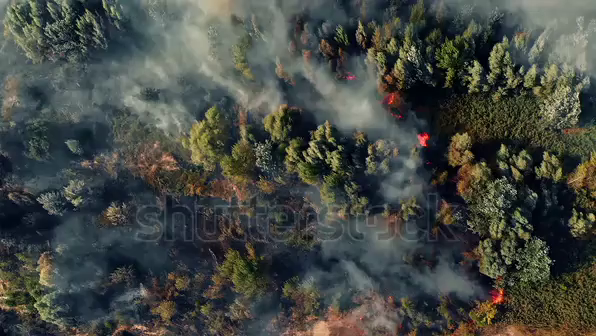

1/1 [==============================] - 0s 67ms/step
Forest fire
SMf8c37e2fd94d71c89a78d517e24734f5
Fire detected
SMS Sent!


In [35]:
# Create a VideoCapture object and read from input file
# If the input is the camera, pass 0 instead of the video file name
cap = cv2.VideoCapture('/content/drive/MyDrive/fire_forest.mp4')
 
# Check if camera opened successfully
if (cap.isOpened()== False): 
  print("Error opening video stream or file")
 
# Read until video is completed
while(cap.isOpened()):
  # Capture frame-by-frame
  ret, frame = cap.read()
  if ret == True:
    x=image.img_to_array(frame)
    res=cv2.resize(x,dsize=(128,128),interpolation=cv2.INTER_CUBIC)
    #expand the image shape
    x=np.expand_dims(res,axis=0)
    model=load_model("/content/forest1.h5")
    cv2_imshow(frame)
    pred=model.predict(x)
    pred = int(pred[0][0])
    pred
    int(pred)
    if pred==0:
      print('Forest fire')
      break
    else:
      print("danger")
      break
 
# When everything done, release the video capture object
cap.release()
 
# Closes all the frames
cv2.destroyAllWindows()
from twilio.rest import Client
from playsound import playsound
if pred==0:
  account_sid='ACa4dd6d88a4256ba4aa8e02cb66185ca5'
  auth_token='af01cd096d7c2d504dc533d8709f02bc'
  client=Client(account_sid,auth_token)
  message=client.messages \
  .create(
      body='forest fire is detected,stay alert',
      #use twilio free number
      from_='+12232175876',
      #to number
      to='+919360672261')
  print(message.sid)
  print("Fire detected")
  print("SMS Sent!")